In [1]:
import sys
sys.path.append("..")
import pandas as pd

In [2]:
from ethicml.algorithms.inprocess import LR, SVM, Agarwal, Kamiran, Kamishima, LRCV, ZafarEqOpp
from ethicml.evaluators import CrossValidator, run_metrics, evaluate_models_async
from ethicml.data import Compas, Adult, load_data
from ethicml.metrics import Accuracy, ProbPos, TPR, TNR, AbsCV, ProbPos, GetInfo
from ethicml.preprocessing import train_test_split, ProportionalSplit
from ethicml.visualisation import plot_results, single_plot

In [3]:
from ethicml_models.tuning_lr import TuningLr, DPFlags, EOFlags

In [4]:
adult_race = Adult("Race")
adult_race.sens_attrs = ['race_White']
data = [
#     Compas("Race"),
#     Compas("Sex"),
    adult_race,
    Adult("Sex"),
]

In [15]:
async def run(dataset, target, topic):
    use_s = False
    epochs = 0
    
    return await evaluate_models_async(
        datasets=[dataset],
        inprocess_models=[
    #         TuningLr(use_s=use_s),
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=target, target_rate_s1=target), use_s=use_s, epochs=epochs),

            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.1, target_rate_s1=0.1), use_s=use_s, epochs=epochs),
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.2, target_rate_s1=0.2), use_s=use_s, epochs=epochs),
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.3, target_rate_s1=0.3), use_s=use_s, epochs=epochs),
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.4, target_rate_s1=0.4), use_s=use_s, epochs=epochs),
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.5, target_rate_s1=0.5), use_s=use_s, epochs=epochs),
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.6, target_rate_s1=0.6), use_s=use_s, epochs=epochs),
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.7, target_rate_s1=0.7), use_s=use_s, epochs=epochs),
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.8, target_rate_s1=0.8), use_s=use_s, epochs=epochs),
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.9, target_rate_s1=0.9), use_s=use_s, epochs=epochs),
            TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=1.0, target_rate_s1=1.0), use_s=use_s, epochs=epochs),
        ],
        metrics=[Accuracy(), ProbPos(), AbsCV(), GetInfo("t_s0"), GetInfo("t_s1"), GetInfo("PR_t")],
        per_sens_metrics=[ProbPos()],
        repeats=1,
        topic=topic,
        splitter=ProportionalSplit(),
        delete_prev=True,
    #     max_parallel=2,
    )
    
avg_race = 0.21144567506  # race
avg_sex = 0.21581616218  # sex
    
# results_sex = await run(dataset=Adult("Sex"), target=avg_sex, topic="gp_bound")
results_race = await run(dataset=adult_race, target=avg_race, topic="gp_bound")

100%|██████████| 11/11 [00:46<00:00,  4.24s/it, model=TuningLR, wd: 0.1, RAdam, PR_t: 1.0, dataset=Adult Race - Train (0), worker_id=0]


In [14]:
results_race.data

Accuracy  \
dataset   transform    model                                         split_id             
Adult Sex no_transform TuningLR, wd: 0.1, RAdam, PR_t: 0.21144567506 0         0.257048   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1           0         0.257048   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2           0         0.257048   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3           0         0.257048   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4           0         0.257048   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.5           0         0.257048   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.6           0         0.257048   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.7           0         0.257048   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.8           0         0.257048   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.9           0         0.257048   
                       TuningLR, wd: 0.1, RAdam, PR_t: 1.0           0         0.257048   

                                                                               CV absolute  \
dataset   transform    model                                         split_id                
Adult Sex no_transform TuningLR, wd: 0.1, RAdam, PR_t: 0.21144567506 0            0.971252   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1           0            0.971252   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2           0            0.971252   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3           0            0.971252   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4           0            0.971252   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.5           0            0.971252   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.6           0            0.971252   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.7           0            0.971252   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.8           0            0.971252   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.9           0            0.971252   
                       TuningLR, wd: 0.1, RAdam, PR_t: 1.0           0            0.971252   

                                                                                   PR_t  \
dataset   transform    model                                         split_id             
Adult Sex no_transform TuningLR, wd: 0.1, RAdam, PR_t: 0.21144567506 0         0.211446   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1           0         0.100000   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2           0         0.200000   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3           0         0.300000   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4           0         0.400000   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.5           0         0.500000   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.6           0         0.600000   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.7           0         0.700000   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.8           0         0.800000   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.9           0         0.900000   
                       TuningLR, wd: 0.1, RAdam, PR_t: 1.0           0         1.000000   

                                                                               prob_pos  \
dataset   transform    model                                         split_id             
Adult Sex no_transform TuningLR, wd: 0.1, RAdam, PR_t: 0.21144567506 0         0.939082   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1           0         0.939082   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2           0         0.939082   
                       TuningLR, 

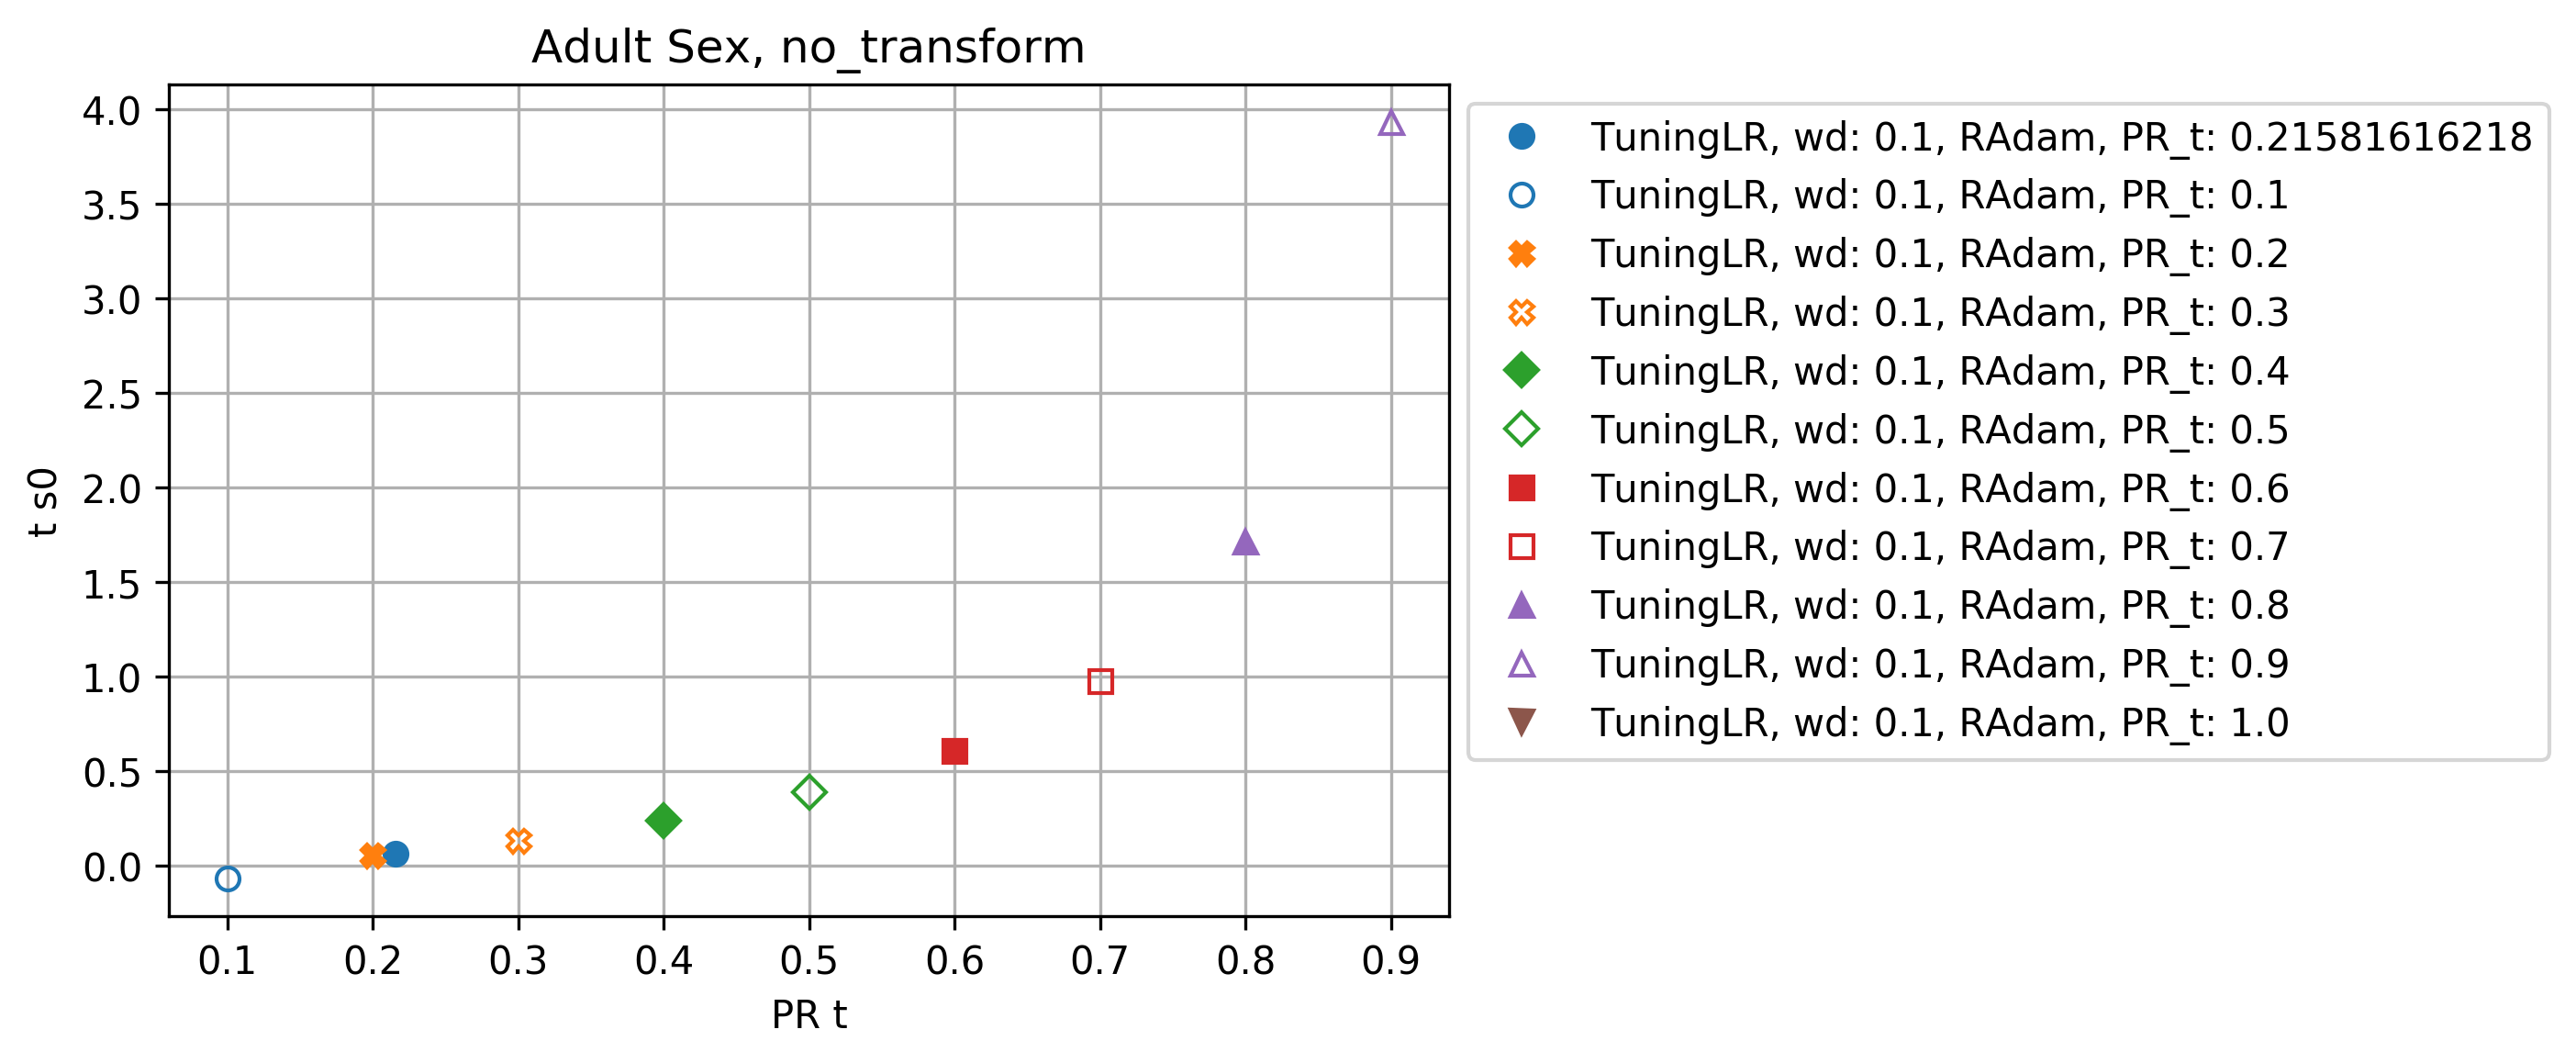

In [11]:
plot_results(results_sex, "t_s0", "PR_t", save=False, ptype="scatter")[0][0]

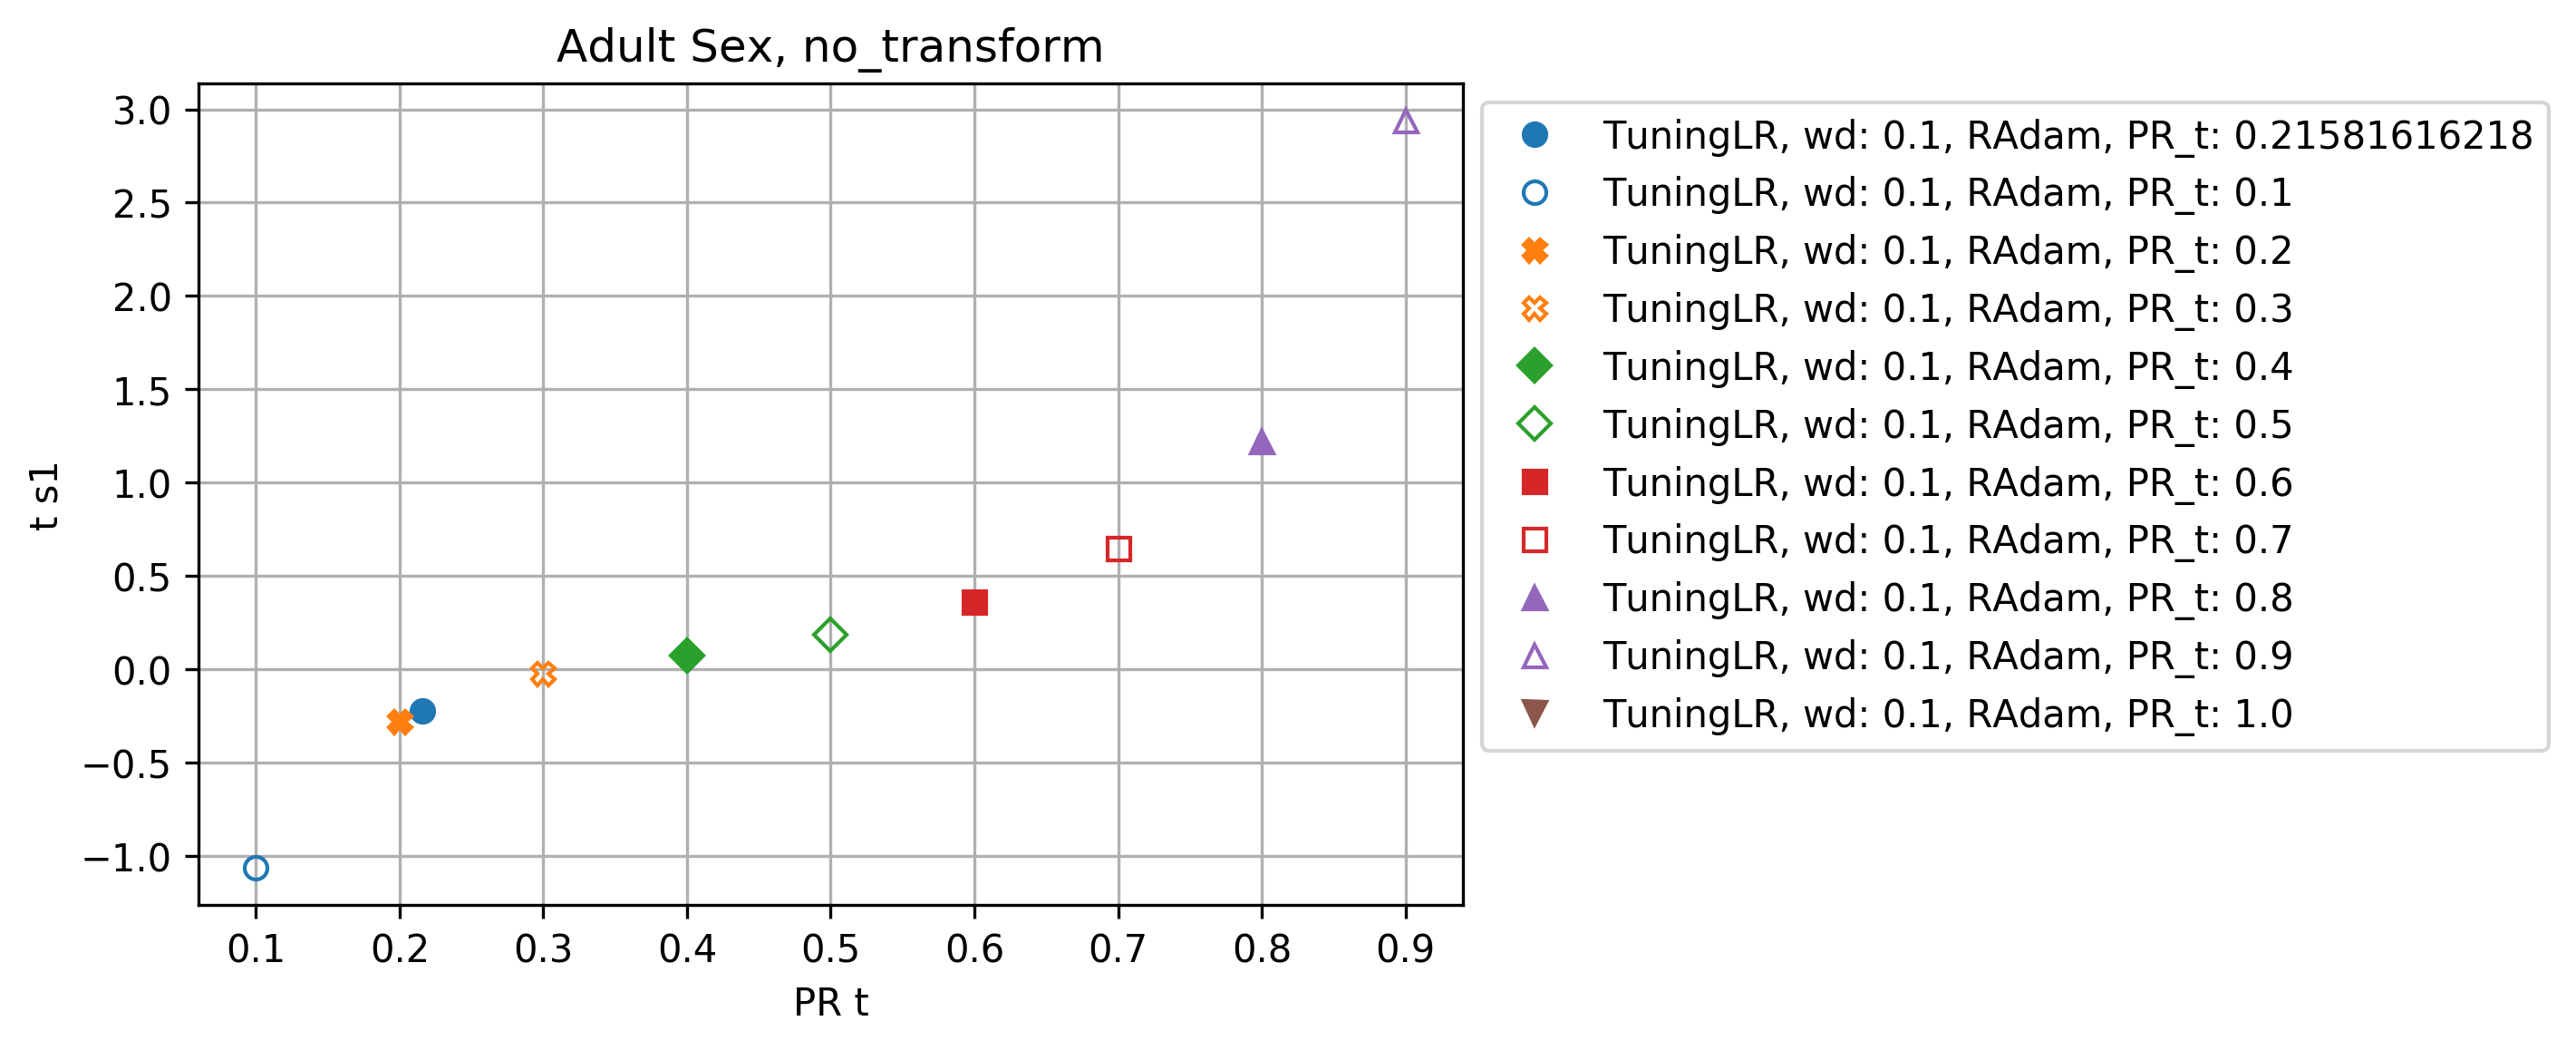

In [10]:
plot_results(results_sex, "t_s1", "PR_t", save=False, ptype="scatter")[0][0]

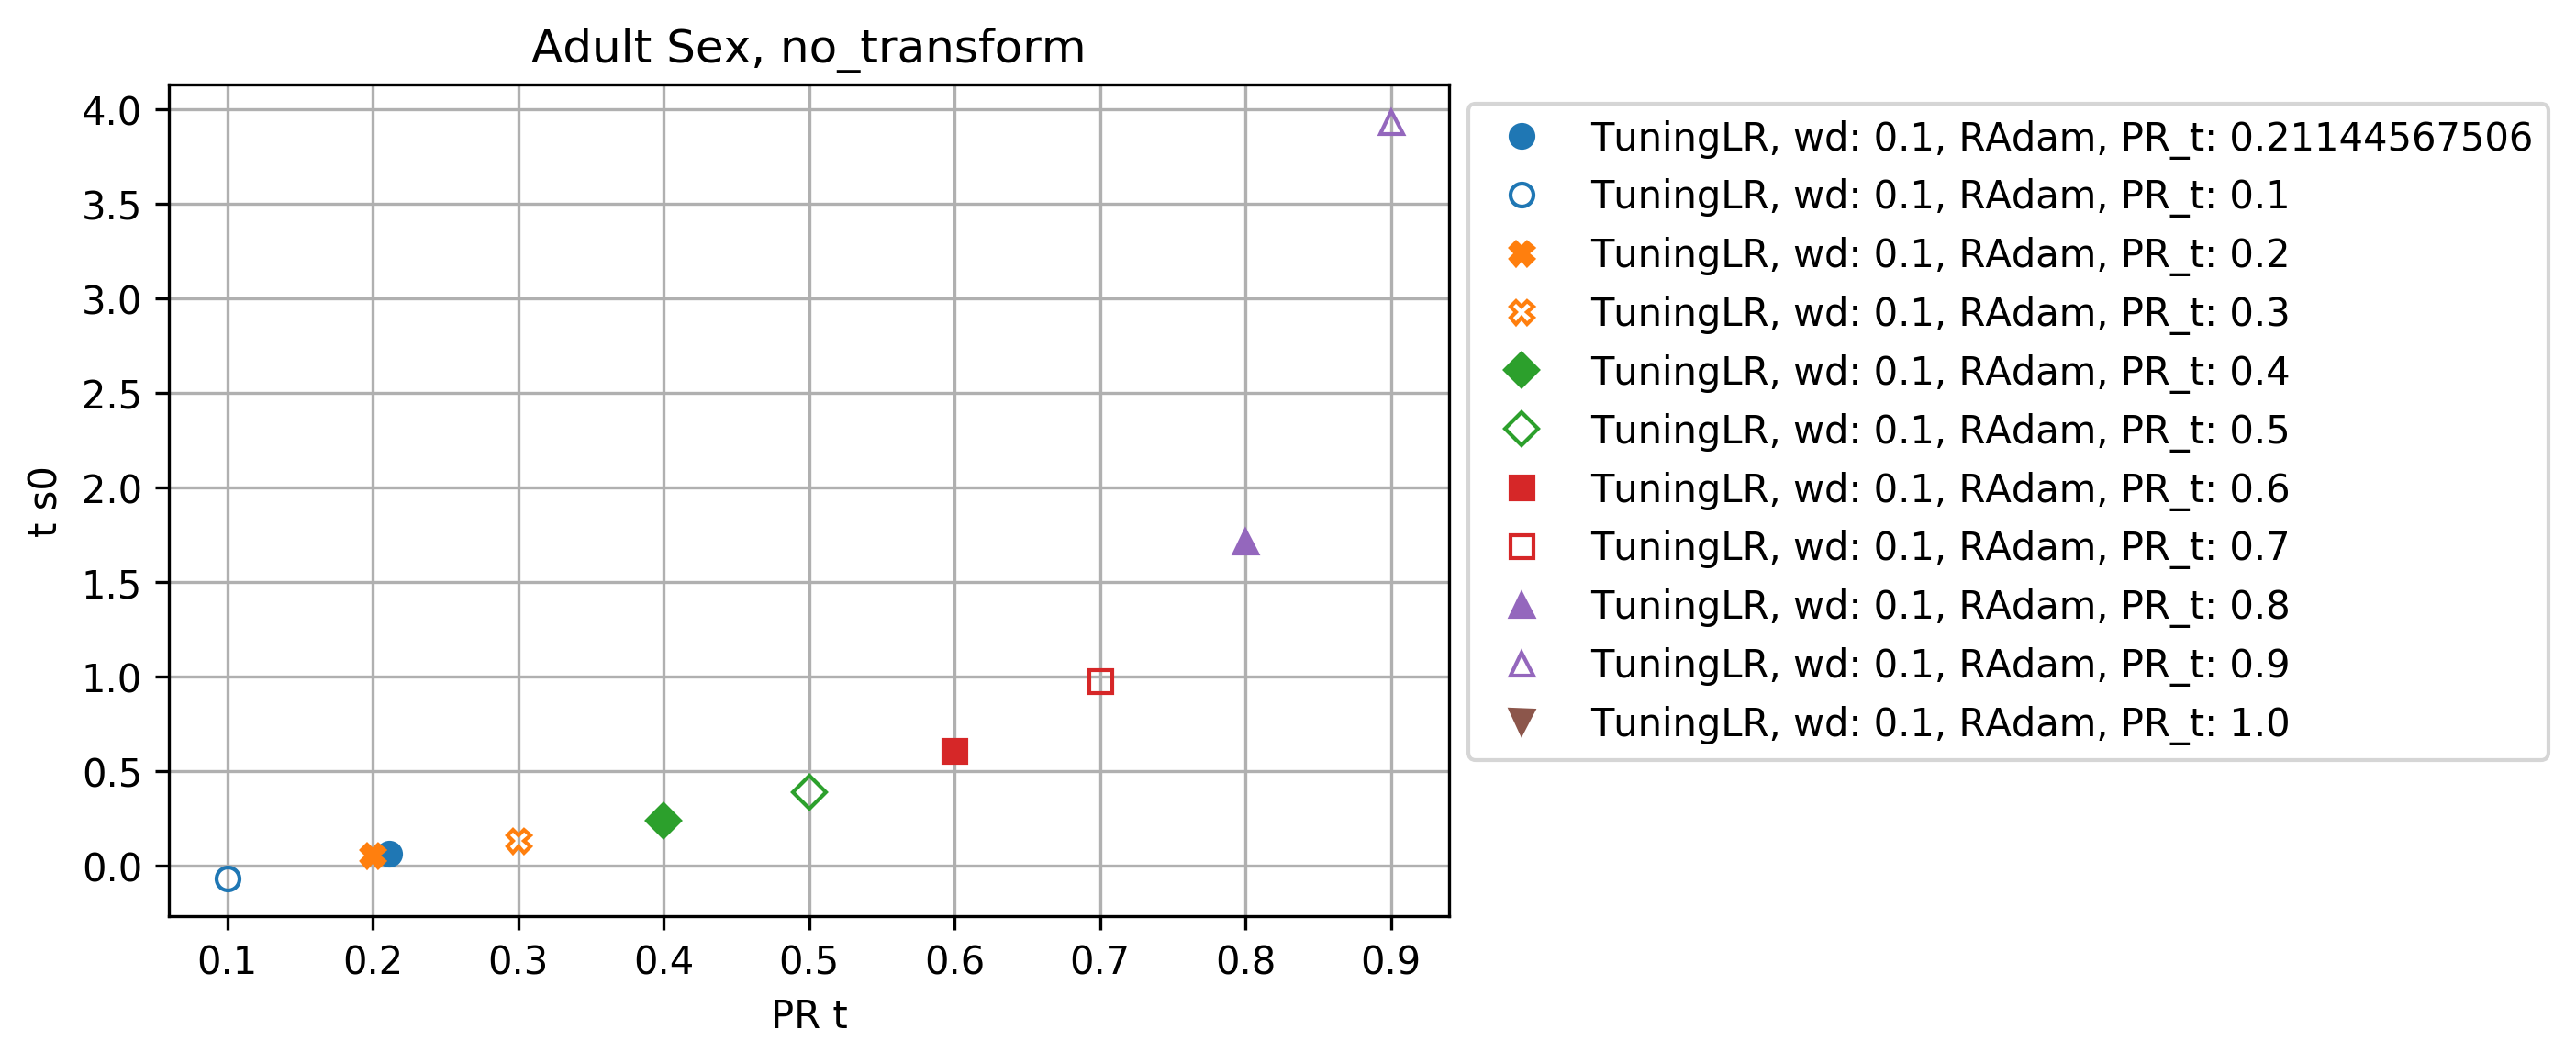

In [12]:
plot_results(results_race, "t_s0", "PR_t", save=False, ptype="scatter")[0][0]

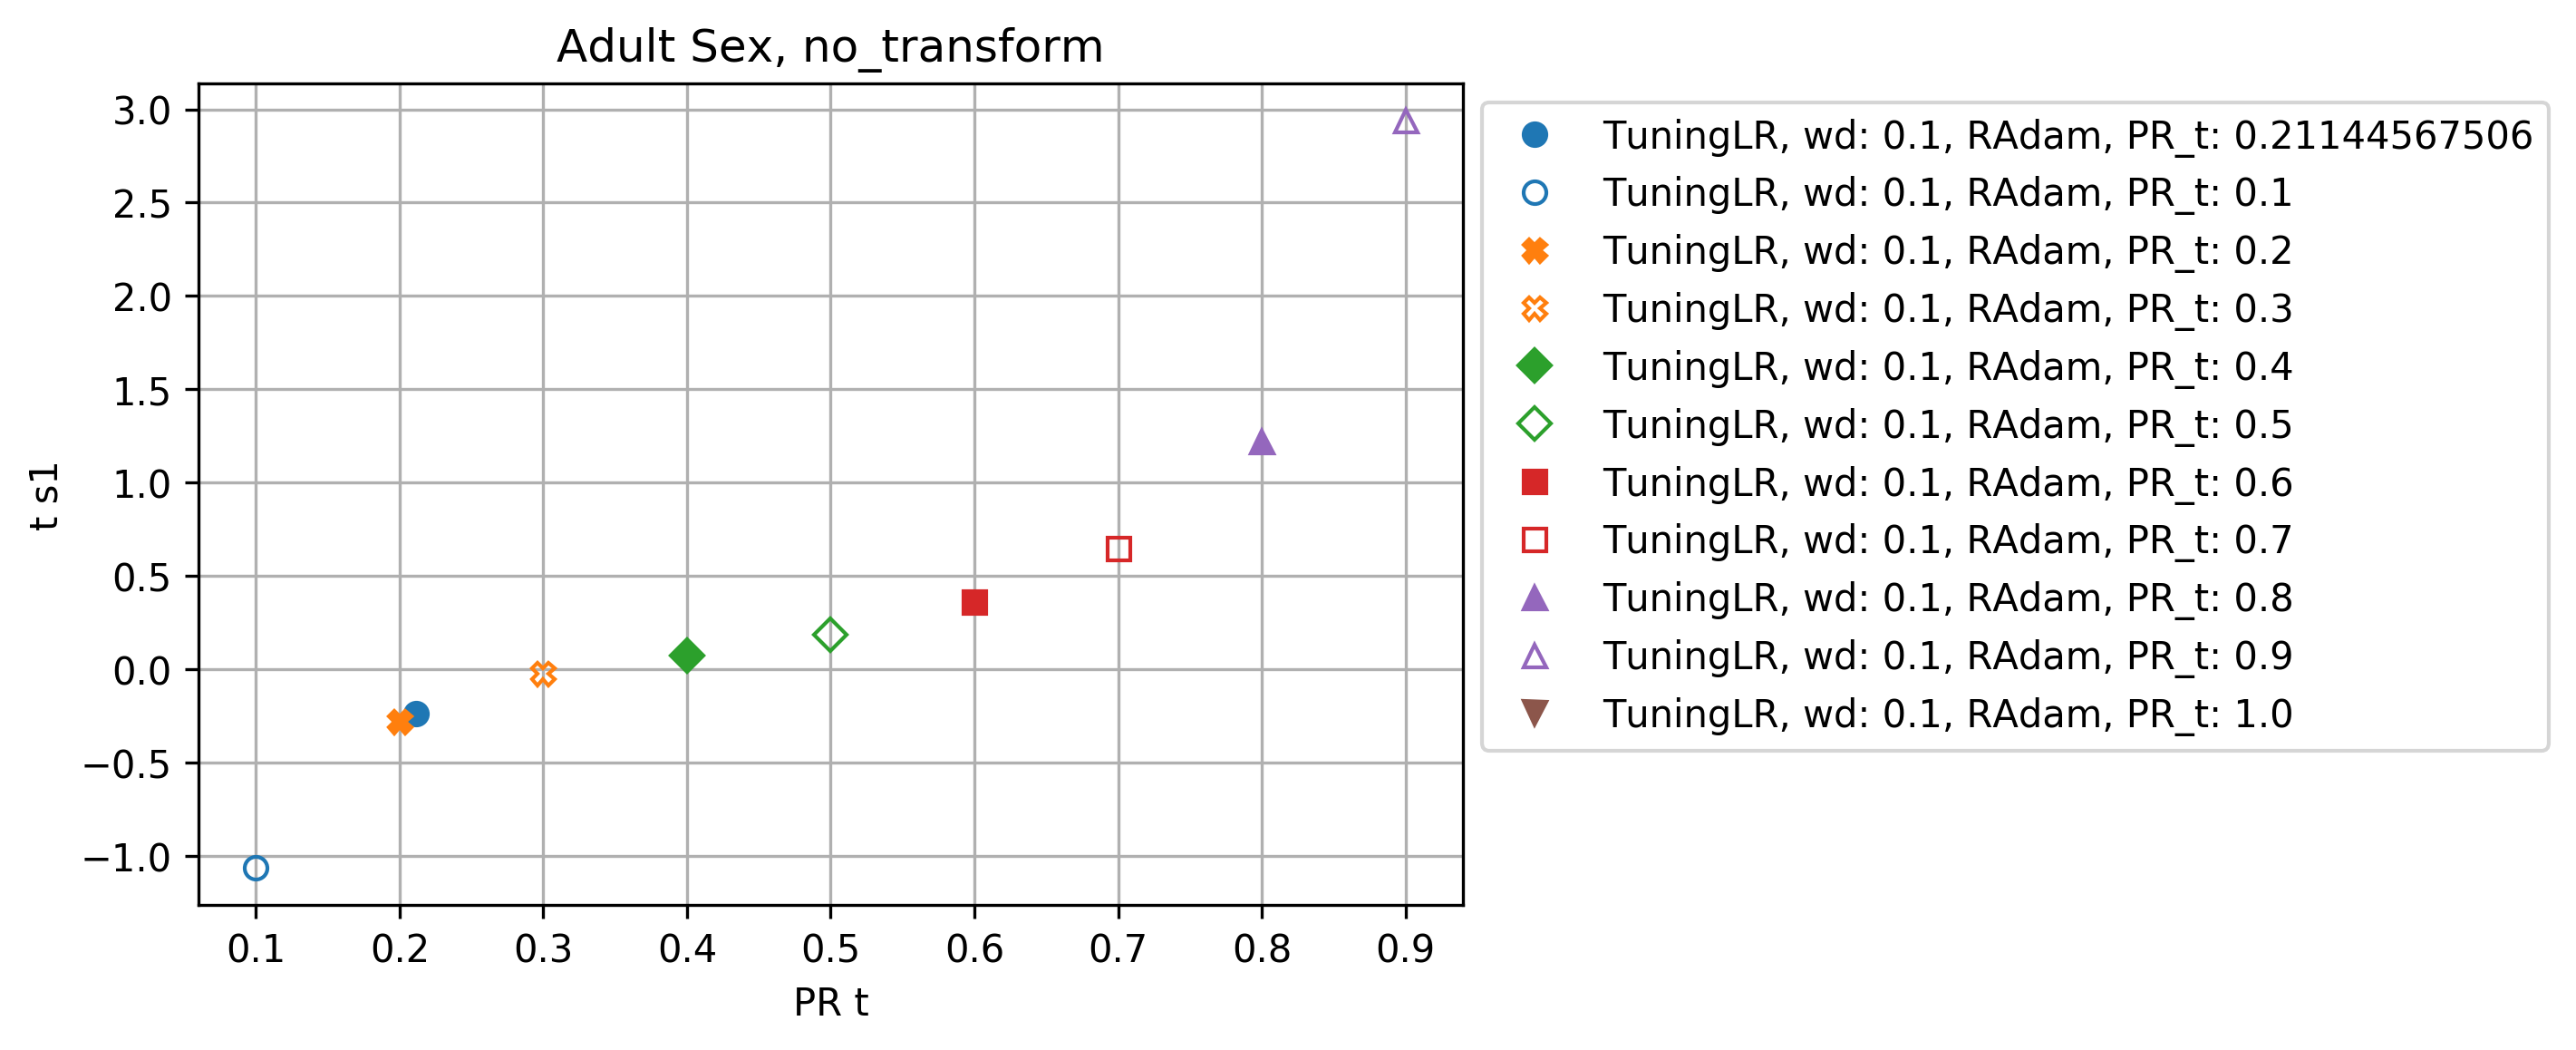

In [13]:
plot_results(results_race, "t_s1", "PR_t", save=False, ptype="scatter")[0][0]